# Intel Image Classification

### Context
This is image data of Natural Scenes around the world.

### Content
Ths data contains around 25k images of size of 150 X 150 distributed under 6 categories

{
    'buildings' -> 0,
    'forest' -> 1,
    'glacier' -> 2,
    'mountain' -> 3,
    'sea' -> 4,
    'street' -> 5
}

Since there are 25k images, there are around 14k images in Train, 3k in Test, and 7k in Prediction.

In [1]:
from tensorflow.keras import layers, activations, models, optimizers, metrics, utils
from keras.utils.vis_utils import model_to_dot

2022-11-07 02:22:23.410173: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 02:22:27.262058: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 02:22:33.972628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 02:22:33.972783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or dire

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import numpy as np
import random

In [3]:
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

from IPython.display import SVG

In [4]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory):
        if labels == "glacier":
            label = 2
        elif labels == "sea":
            label = 4
        elif labels == "buildings":
            label = 0
        elif labels == "forest":
            label = 1
        elif labels == "street":
            label = 5
        elif labels == "mountain":
            label = 3
            
        for image_file in os.listdir(directory + labels):
            image = cv2.imread(directory + labels + r'/' + image_file)
            image = cv2.resize(image, (150, 150))
            
            Images.append(image)
            Labels.append(label)
            
    return Images, Labels

def get_classlabel(class_code):
    labels = {
        0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'
    }
    
    return labels[class_code]

In [5]:
Images, Labels = get_images("dataset/seg_train/seg_train/")

In [ ]:
Images = np.array(Images)
Labels = np.array(Labels)

In [7]:
print("Shape of images: ", Images.shape)
print("Shape of labels: ", Labels.shape)

Shape of images:  (14034, 150, 150, 3)
Shape of labels:  (14034,)


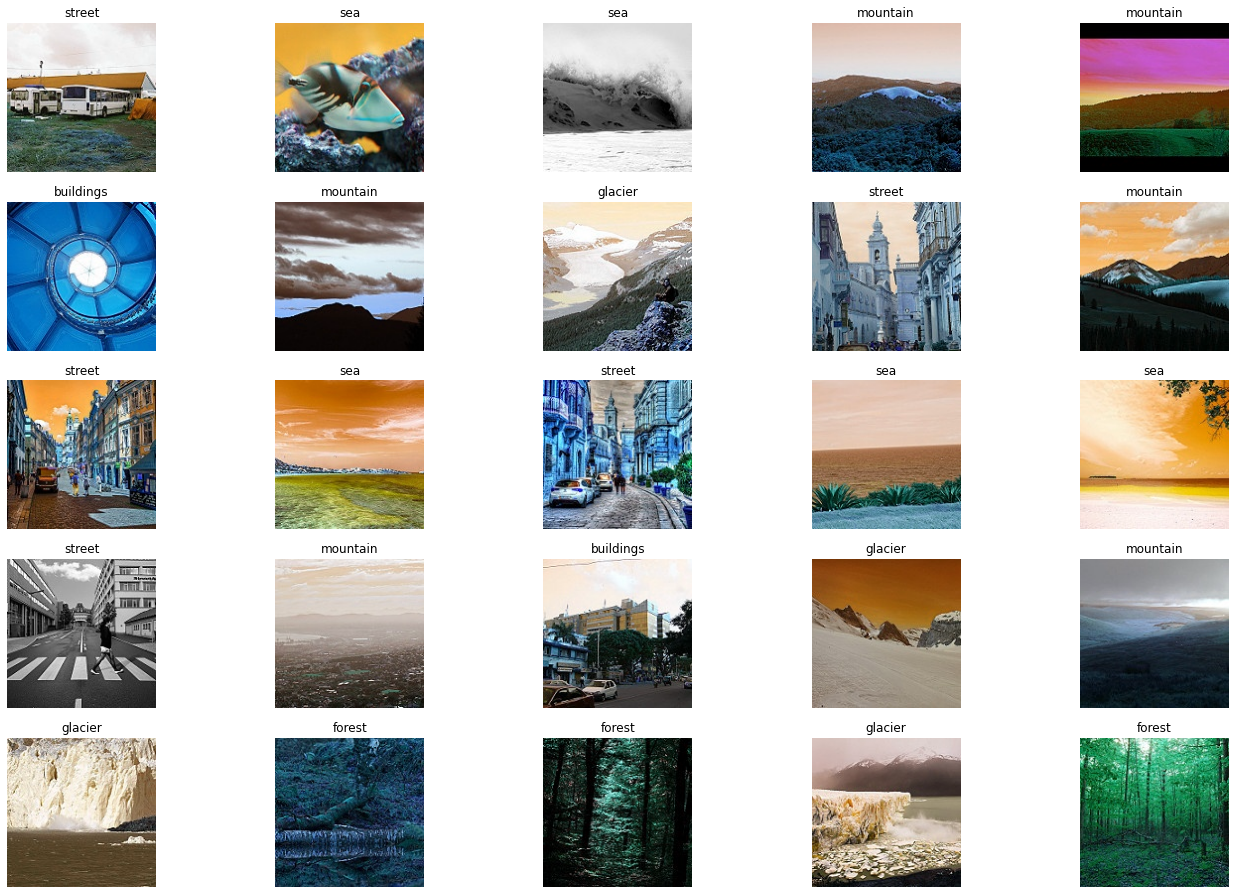

In [8]:
f, ax = plt.subplots(5, 5)
f.subplots_adjust(0, 0, 3, 3)

for i in range(0, 5):
    for j in range(0, 5):
        rnd_number = random.randint(0, len(Images))
        
        ax[i, j].imshow(Images[rnd_number])
        ax[i, j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i, j].axis('off')

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(200, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(180, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(5, 5))

model.add(layers.Conv2D(180, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(140, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(100, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(50, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(5, 5))

model.add(layers.Flatten())

model.add(layers.Dense(180, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(6, activation='relu'))

2022-10-30 14:23:01.448283: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-30 14:23:01.540802: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cskushal18): /proc/driver/nvidia/version does not exist
2022-10-30 14:23:02.122035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(
    optimizer=optimizers.Adam(lr=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/home/cskushal18/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

In [ ]:
trained = model.fit(Images, Labels, epochs=5, validation_split=0.30)